# **CosmiCode-Internship Week-6**


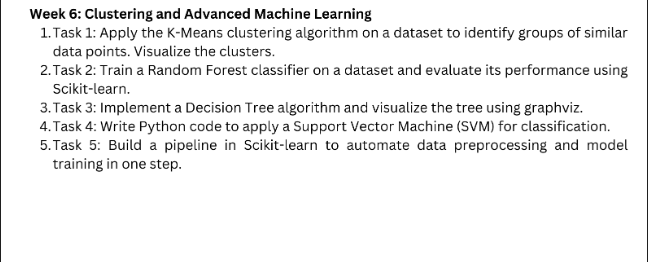

### Task-1: K-Means Clustering


K-Means is an **unsupervised machine learning algorithm** used for grouping data points into clusters based on their similarity. It minimizes the variance within clusters while maximizing the variance between clusters.

### How it works:
1. Initialize ( k ) cluster centroids randomly.
2. Assign each data point to the nearest centroid.
3. Update centroids as the mean of all points assigned to them.
4. Repeat until the centroids stabilize or a maximum number of iterations is reached.

### Key Concepts:
- Inertia: Measures the sum of squared distances between data points and their centroids. Lower inertia indicates better-defined clusters.
- Elbow Method: Helps determine the optimal number of clusters by plotting inertia against \( k \). The "elbow" point indicates the ideal number of clusters.

### Why use K-Means?
- Useful for grouping similar data (e.g., customer segmentation, pattern detection).
- Fast and computationally efficient for large datasets.


In [1]:
import pandas as pd
housing_dataset_path = "/mnt/data/Housing.csv"

# Read the dataset
housing_data = pd.read_csv("Datasets/House Price Prediction/Housing.csv")

# Display the first few rows of the dataset to understand its structure
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables using LabelEncoder
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoder = LabelEncoder()

for col in categorical_cols:
    housing_data[col] = encoder.fit_transform(housing_data[col])

# Scale numerical columns for K-Means
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
housing_data_scaled = housing_data.copy()
housing_data_scaled[numerical_cols] = scaler.fit_transform(housing_data[numerical_cols])

# Display the first few rows of the preprocessed dataset
housing_data_scaled.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0


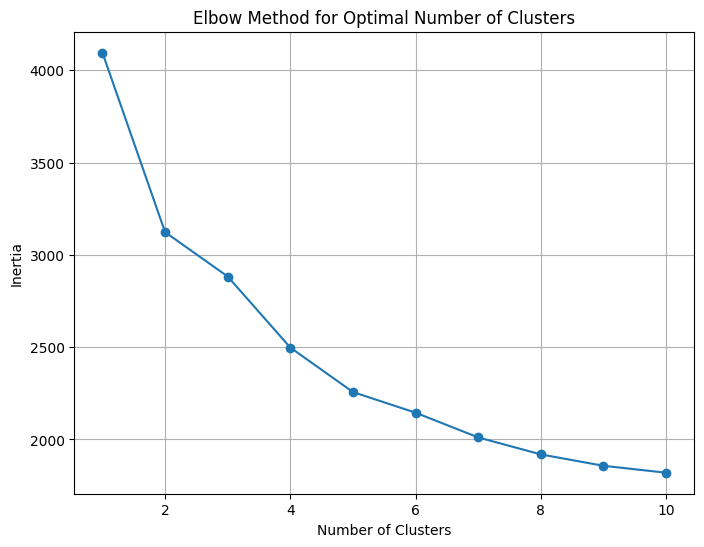

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)  # Test 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(housing_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

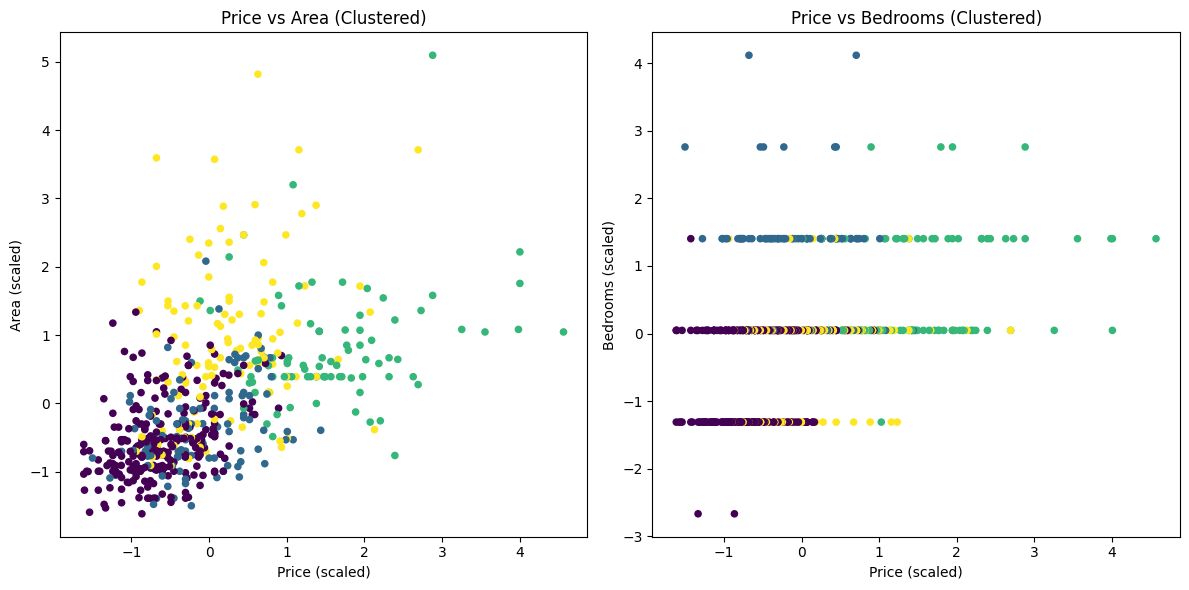

In [5]:
# Create scatter plots for selected pairs of features, color-coded by cluster
plt.figure(figsize=(12, 6))

# Scatter plot of 'price' vs 'area'
plt.subplot(1, 2, 1)
plt.scatter(housing_data_scaled['price'], housing_data_scaled['area'], c=housing_data_scaled['Cluster'], cmap='viridis', s=20)
plt.title('Price vs Area (Clustered)')
plt.xlabel('Price (scaled)')
plt.ylabel('Area (scaled)')

# Scatter plot of 'price' vs 'bedrooms'
plt.subplot(1, 2, 2)
plt.scatter(housing_data_scaled['price'], housing_data_scaled['bedrooms'], c=housing_data_scaled['Cluster'], cmap='viridis', s=20)
plt.title('Price vs Bedrooms (Clustered)')
plt.xlabel('Price (scaled)')
plt.ylabel('Bedrooms (scaled)')

plt.tight_layout()
plt.show()

### Task-2: Random Forest Classifier

Random Forest is an **ensemble learning method** used for classification and regression. It operates by constructing multiple decision trees and combining their predictions for better accuracy and generalization.

### How it works:
1. The algorithm builds several decision trees on random subsets of the data (bootstrap sampling).
2. Each tree predicts the output, and the forest aggregates the predictions (majority vote for classification).

### Advantages:
- Handles missing data and non-linear relationships effectively.
- Reduces overfitting compared to a single decision tree.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = housing_data_scaled.drop(columns=['Cluster'])  # Features
y = housing_data_scaled['Cluster']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_classifier.predict(X_test)

# Classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.9390243902439024,
 '              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98        76\n           1       0.93      0.90      0.91        29\n           2       0.82      0.92      0.87        25\n           3       1.00      0.85      0.92        34\n\n    accuracy                           0.94       164\n   macro avg       0.93      0.92      0.92       164\nweighted avg       0.94      0.94      0.94       164\n')

### Task-3: Decision Tree

A Decision Tree is a flowchart-like structure used for decision-making. It splits data into branches based on feature values to make predictions.

### Key Elements:
- **Nodes:** Represent conditions on feature values.
- **Edges:** Indicate the outcome of the condition (True/False).
- **Leaves:** Represent the final decision or predicted class.

### Visualization:
- Tools like Graphviz display decision trees in a human-readable format.
- Helps interpret how the model makes decisions and identify important features.


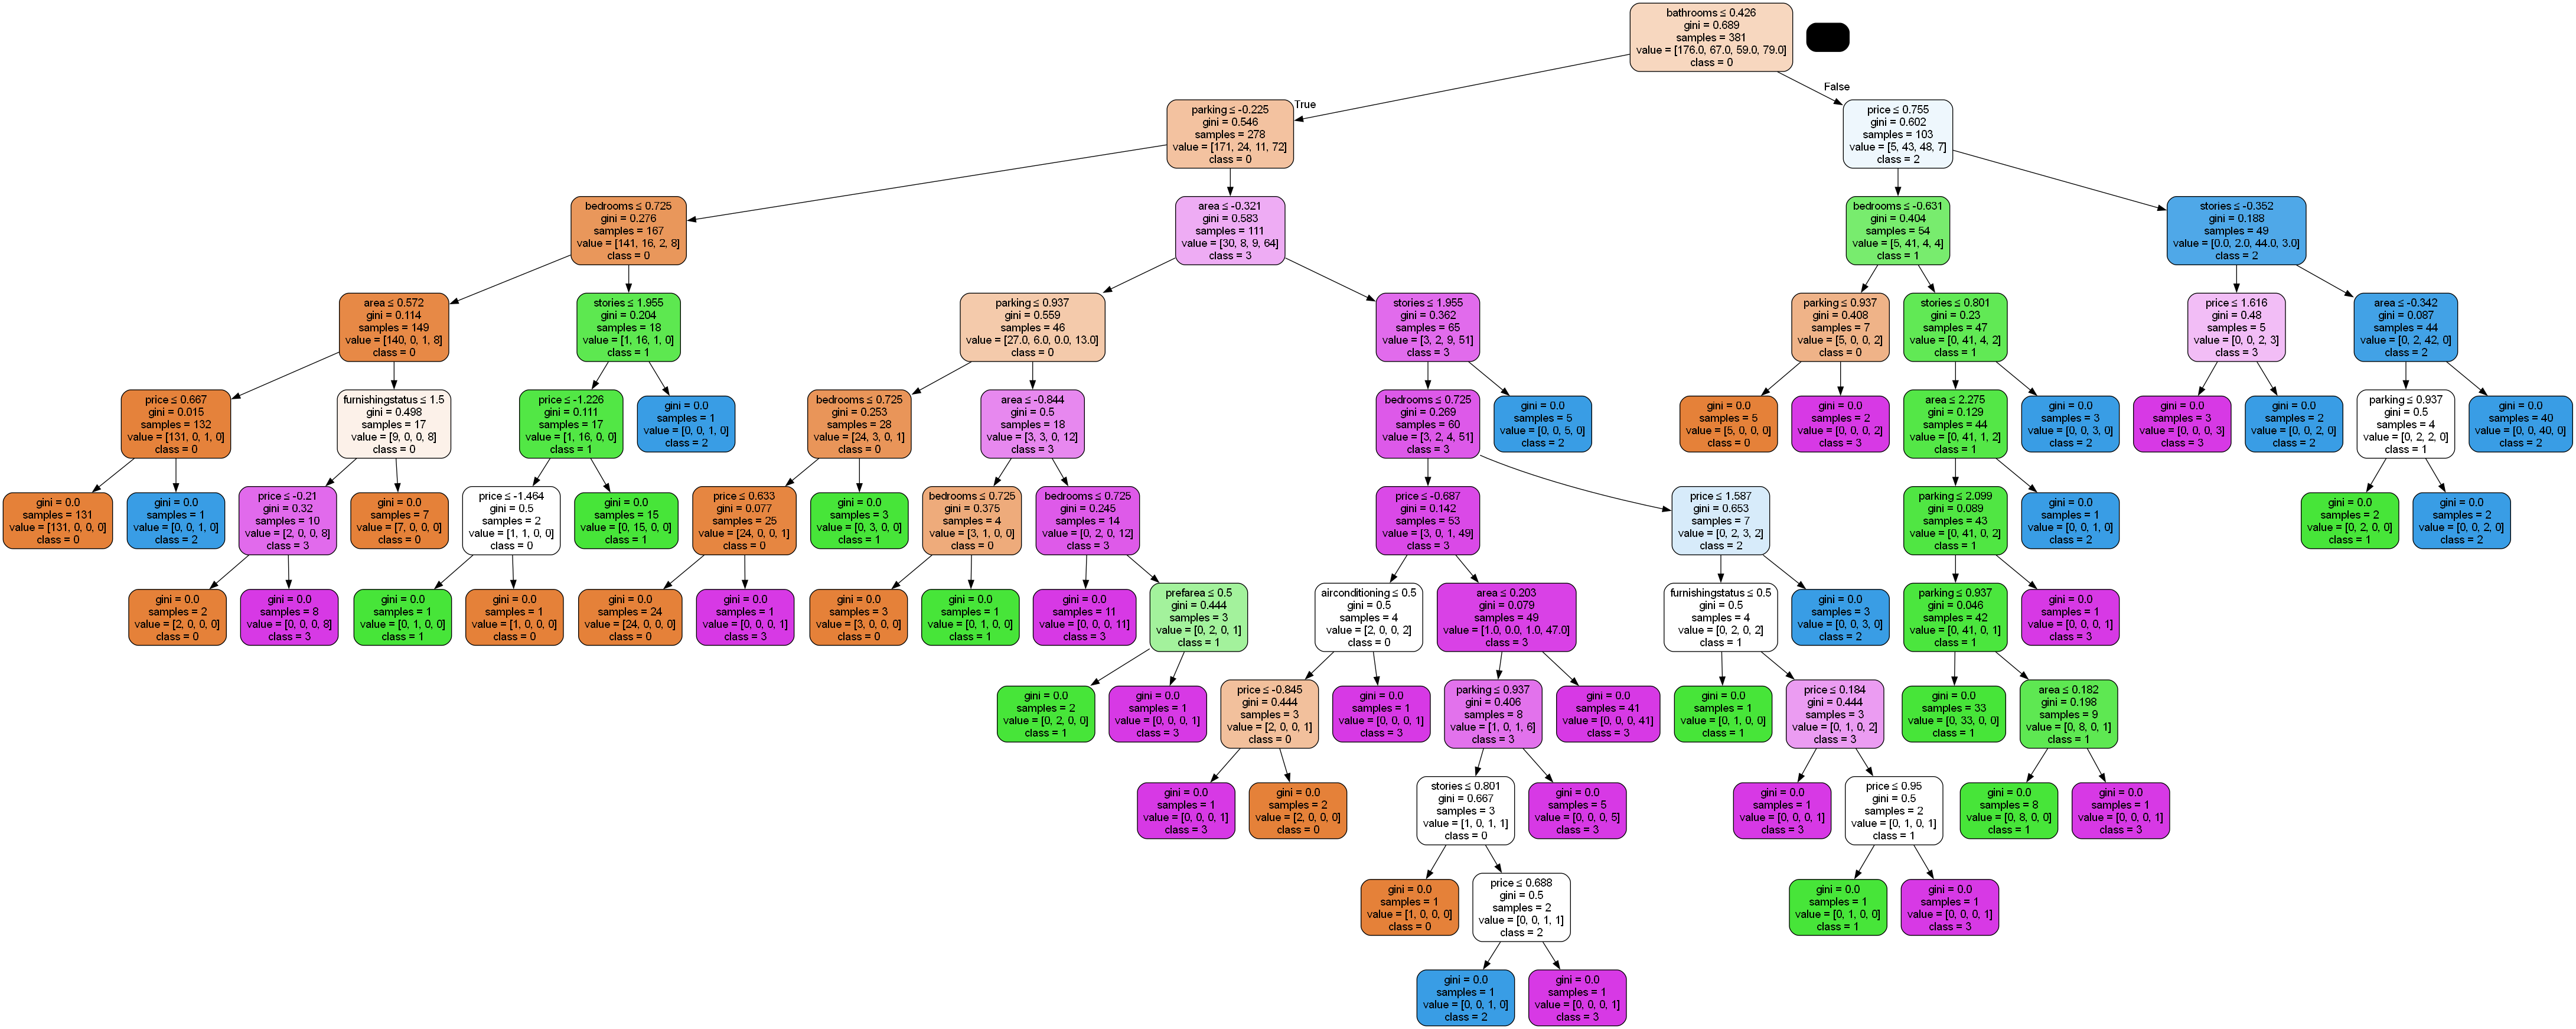

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Visualize the Decision Tree using Graphviz
dot_data = export_graphviz(
    dt_classifier, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=[str(cls) for cls in dt_classifier.classes_], 
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Create the graph and render it
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Task-4: Support Vector Machine

SVM is a **supervised learning algorithm** used for classification and regression. It works by finding the hyperplane that best separates the classes in the feature space.

### How it works:
1. SVM finds the optimal hyperplane that maximizes the margin (distance between the hyperplane and the nearest data points of each class, called support vectors).
2. For non-linear data, SVM uses **kernels** (e.g., RBF) to transform the data into higher dimensions where it becomes separable.

### Why use SVM?
- Effective in high-dimensional spaces and with non-linear relationships.
- Robust to overfitting, especially with properly tuned parameters.

### Kernel Functions:
- **Linear:** For linearly separable data.
- **RBF (Radial Basis Function):** For non-linear data.


In [10]:
from sklearn.svm import SVC

# Train an SVM classifier
svm_classifier = SVC(random_state=42, kernel='rbf')  # Using RBF kernel for non-linear decision boundaries
svm_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_svm = svm_classifier.predict(X_test)

# Classification report and accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

accuracy_svm, classification_rep_svm

(0.9634146341463414,
 '              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98        76\n           1       0.97      0.97      0.97        29\n           2       0.92      0.92      0.92        25\n           3       1.00      0.91      0.95        34\n\n    accuracy                           0.96       164\n   macro avg       0.96      0.95      0.96       164\nweighted avg       0.96      0.96      0.96       164\n')

### Task-5: Pipelines in Scikit-Learn

A pipeline is a sequence of data preprocessing steps and a machine learning model, bundled together for efficiency and reproducibility.

### Purpose:
- Automates repetitive steps like scaling, encoding, and model training.
- Ensures consistent preprocessing across training and testing data.

### How it works:
1. Define a series of steps in a Pipeline object (e.g., scaling → model).
2. Fit the pipeline on training data, which sequentially applies each step.
3. Predict on new data with the same steps automatically applied.

### Advantages:
- Simplifies workflows for large and complex datasets.
- Prevents data leakage by ensuring preprocessing is applied only on the training set during cross-validation.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline with preprocessing and SVM model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC(random_state=42, kernel='rbf'))  # SVM model
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
y_pred_pipeline = pipeline.predict(X_test)
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
classification_rep_pipeline = classification_report(y_test, y_pred_pipeline)

accuracy_pipeline, classification_rep_pipeline

(0.9451219512195121,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96        76\n           1       0.93      0.97      0.95        29\n           2       0.96      0.92      0.94        25\n           3       0.94      0.88      0.91        34\n\n    accuracy                           0.95       164\n   macro avg       0.94      0.94      0.94       164\nweighted avg       0.95      0.95      0.94       164\n')